<h1><center>FIFA 2022 Player Clustering using KMeans</center></h1>

<h3><center>by Iman Ngwepe-Ntshibida</center></h3>

# Objective

To select 5 features from among the 110 columns in the FIFA season 2022 dataset from Kaggle for this project. Football players will be divided into three subgroups according to a KMeans clustering model built upon maximum and minimum scaled features. Visualization of the subgroups will be carried out using a PCA model and then the original model will be compared with the sklearn KMeans algorithm.

source: https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

# Data Preparation

## Importing 

In [2]:
# read file
play = pd.read_csv('players_22.csv')
print(play.shape)
play.head()

(19239, 110)


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


# Wrangling

In [3]:
# define 5 chosen features from the 110 
features = ['overall', 'potential', 'wage_eur', 'value_eur', 'age']

# Cleaning

In [4]:
# drop missing values
play = play.dropna(subset=features)

In [5]:
# make copy of original df
data = play[features].copy()

In [6]:
# about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19165 entries, 0 to 19238
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   overall    19165 non-null  int64  
 1   potential  19165 non-null  int64  
 2   wage_eur   19165 non-null  float64
 3   value_eur  19165 non-null  float64
 4   age        19165 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 898.4 KB


## 1. Scale the data

In [7]:
# use min max by hand to scale in range 1 - 10
data = ((data - data.min()) / (data.max() - data.min())) * 9 + 1

In [8]:
# statistical summary
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.219443,1.131826,4.063345
std,1.346635,1.191076,0.501528,0.353229,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.012876,1.021620,2.666667
50%,4.717391,5.304348,1.064378,1.044817,4.000000
75%,5.500000,6.086957,1.193133,1.092370,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


- min value is 1 and max is 10 in each column, preserving the variance.

In [9]:
data.head(5)

,overall,potential,wage_eur,value_eur,age
0,10.000000,9.608696,9.227468,4.618307,7.000000
1,9.804348,9.413043,7.939914,6.543654,6.333333
2,9.608696,9.217391,7.939914,3.087308,7.666667
3,9.608696,9.217391,7.939914,6.984396,5.333333
4,9.608696,9.217391,10.000000,6.822018,5.666667


## 2. Initialize random centroids

In [10]:
# multiple centriods

def random_centriods(data , k):
    
    centroids= []
    
    for i in range(k):
        centroid = data.apply(lambda x:float(x.sample()))
        centroids.append(centroid)
    # combine the individual centroid series into a dataframe
    return pd.concat(centroids, axis=1)

In [11]:
# generated centroids check for 5 clusters
centroids = random_centriods(data, 5)

In [12]:
centroids

,0,1,2,3,4
overall,4.326087,4.521739,4.521739,5.108696,4.913043
potential,4.326087,3.934783,5.304348,7.652174,6.282609
wage_eur,1.115880,1.321888,1.012876,1.244635,1.193133
value_eur,1.059895,1.044817,1.012341,1.110928,1.078452
age,3.666667,2.333333,6.666667,3.000000,5.000000


## 3. Label each data point

In [13]:
def get_labels(data, centroids):
    # calculate the distance between each data point and the centroid
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    # find index of min value in row i.e cluster assignment of each data point
    return distances.idxmin(axis=1)

In [14]:
# cluster labels for each data point(player)
labels = get_labels(data, centroids)

In [15]:
# how many players in each cluster
labels.value_counts()

0    6289
4    3768
3    3463
2    3227
1    2418
dtype: int64

## 4. Update centroids

In [16]:
def new_centroids(data, labels, k):
    # geometric mean, transpose to turn column into feature
    return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T

## 5. Repeat steps 3 and 4 until centroids stop changing

In [17]:
# to clear output each time we make new graph
from IPython.display import clear_output

In [18]:
# plot cluster assignments as they iterate using PCA to visualize data in 2D
def plot_clusters(data, labels, centroids, iteration):
    # instance and fit of model and centroids
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.fit_transform(centroids.T)
    
    clear_output(wait=True)
    
    plt.title(f'Iteration {iteration}')
    # plot scatter plots of data and centroids
    plt.scatter(x=data_2d[:,0],y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    
    plt.show()

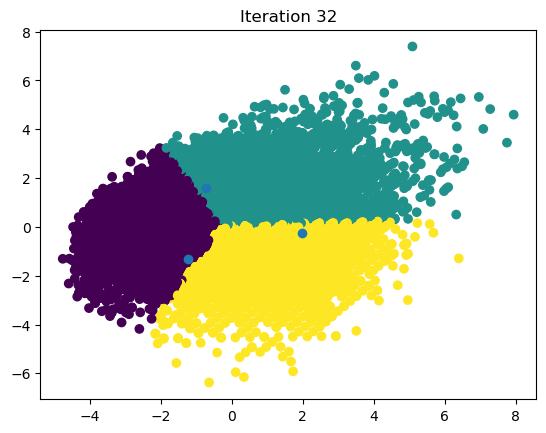

In [19]:
# KMeans Model

# total number of model iterations
max_iterations = 100
# number of clusters
k = 3
# initialize random centroids
centroids = random_centriods(data, k)
# initialize old centroids
old_centroids = pd.DataFrame()
# start
iteration = 1

# stop loop is max_iter=100 or when centroids = old centroids
while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    # get labels of each player (find clusters they fall into)
    labels = get_labels(data, centroids)
    # update centroid values based on geometric mean of all playesr assigned to cluster
    centroids = new_centroids(data, labels, k)
    # plot of clusters
    plot_clusters(data, labels, centroids, iteration)
    # increase in steps of 1
    iteration += 1

In [20]:
# the cluster groups
centroids

,0,1,2
overall,3.206838,5.806043,4.784633
potential,4.928473,6.497993,4.506962
wage_eur,1.028505,1.420001,1.118904
value_eur,1.026614,1.285501,1.044980
age,2.518708,3.596161,5.472247


>Intrepreting the centroids, 

In terms of overall performance, the players are classified into three groups: high, medium, and low.

    High-(cluster 1), they are middle-aged, have tremendous potential and overall performance, as well as wages and value to the team.

    Medium -(cluster 2) players have strong overall performance and modest potential, salary, and team worth.

    Low-(cluster 0), younger players with a lot of potential and decent performance but less money and value to the squad.

In [21]:
# confirm hypothesis initial df
play[labels ==1][['short_name'] + features]

,short_name,overall,potential,wage_eur,value_eur,age
0,L. Messi,93,93,320000.0,78000000.0,34
1,R. Lewandowski,92,92,270000.0,119500000.0,32
2,Cristiano Ronaldo,91,91,270000.0,45000000.0,36
3,Neymar Jr,91,91,270000.0,129000000.0,29
4,K. De Bruyne,91,91,350000.0,125500000.0,30
...,...,...,...,...,...,...
13245,D. Scarlett,63,86,3000.0,1500000.0,17
13256,L. Bate,63,83,5000.0,1300000.0,18
13351,Llabrés,63,81,3000.0,1200000.0,19
14144,H. Mejbri,62,84,6000.0,1300000.0,18


## Comparing with sklearn implementation

In [22]:
from sklearn.cluster import KMeans

In [23]:
# instance of KMeans with n_clusters = 3
kmeans = KMeans(3)
# fitting the model
kmeans.fit(data)

KMeans(n_clusters=3)

In [24]:
# getting the centroids
centroids = kmeans.cluster_centers_

In [25]:
# creating cluster dataframe
pd.DataFrame(centroids, columns= features).T

,0,1,2
overall,6.226470,3.596813,4.801395
potential,6.620782,5.204622,4.504272
wage_eur,1.654994,1.039850,1.113039
value_eur,1.412551,1.035691,1.040041
age,4.136990,2.710514,5.609582


- Using sklearn KMeans, the clusters are organized differently but still include the same groups of low, medium, and high categories according to the 5 features.